{('Bydgoszcz', 'Warszawa'): Text(19.509, 52.676, '3'),
 ('Warszawa', 'Gdańsk'): Text(19.8285, 53.290499999999994, '1'),
 ('Warszawa', 'Zielona Góra'): Text(18.258499999999998, 52.082, '5'),
 ('Warszawa', 'Wrocław'): Text(19.022, 51.664500000000004, '7'),
 ('Warszawa', 'Poznań'): Text(18.97, 52.3175, '4'),
 ('Warszawa', 'Rzeszów'): Text(21.505000000000003, 51.135000000000005, '6'),
 ('Warszawa', 'Lublin'): Text(21.7885, 51.7395, '8'),
 ('Warszawa', 'Katowice'): Text(20.019, 51.2435, '9'),
 ('Warszawa', 'Kraków'): Text(20.4735, 51.145, '10'),
 ('Warszawa', 'Szczecin'): Text(17.782, 52.828500000000005, '2')}

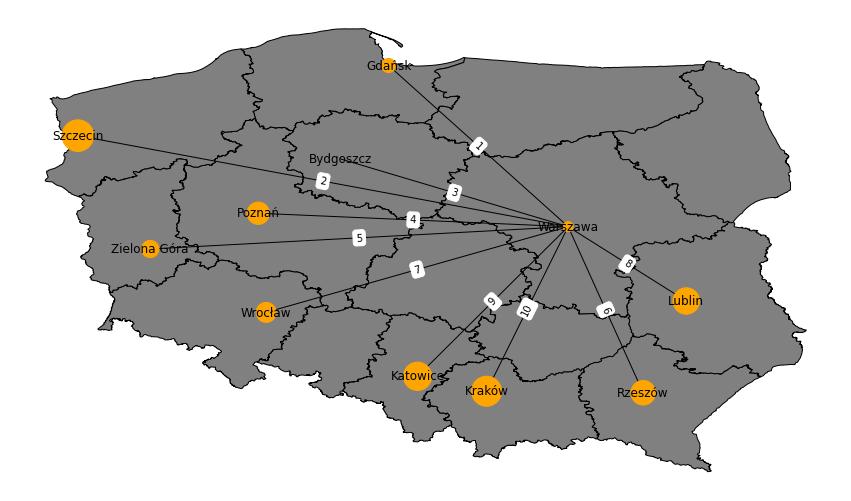

In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# mapa Polski zostala pobrana ze strony:
# http://www.gugik.gov.pl/pzgik/dane-bez-oplat/dane-z-panstwowego-rejestru-granic-i-powierzchni-jednostek-podzialow-terytorialnych-kraju-prg

m = gpd.read_file('mapa_pl/Województwa.shp')
m.plot(figsize=(15,17),
    edgecolors="black",
    color="grey")
czas= pd.read_csv('pl_podroz3.csv')
dane = pd.read_csv('miasta.csv')
gg = list(zip(czas['city'],czas['destination'],czas['drive_time']))
G2 = nx.Graph()
G2.add_weighted_edges_from(gg)
xy = list(zip(dane['y'],dane['x']))
p = list(dane['miasto'])
wagi = [i['weight'] for i in G2.edges.values()]
awe=nx.get_edge_attributes(G2,'weight')
pos = {i:j for i,j in zip(p,xy)}
node_sizes = []
node_size_custom = 0
for n in p:
    node_sizes.append(node_size_custom)
    node_size_custom = node_size_custom + 100
nx.draw(G2, pos,
         node_shape='o',
         node_size=node_sizes,
         # edge_color=colors,
         node_color="orange",
         arrows=False,
         weight_size=45,
         with_labels=True)
nx.draw_networkx_edge_labels(G2,pos, edge_labels=awe)


